<a href="https://colab.research.google.com/github/Luuhlf/Analytics-Estudos-Mercado-Financeiro/blob/volatilidade/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pandas

In [1]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 9.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import yfinance as yf

In [3]:
dicionario = {"empresa": ["Weg", "Petro", "Vale",],
              "cotacoes": [20,30,50.40]}

df = pd.DataFrame(dicionario)

display(df)

,empresa,cotacoes
0,Weg,20.0
1,Petro,30.0
2,Vale,50.4


In [4]:
dados_empresas = yf.download("WEGE3.SA", start = '2018-01-01', end = '2022-12-31')

display(dados_empresas)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,9.365384,9.680769,9.365384,9.623076,8.918212,4812860
2018-01-03,9.576923,9.596153,9.457692,9.476923,8.782764,4652960
2018-01-04,9.530769,9.584615,9.384615,9.384615,8.697221,3317600
2018-01-05,9.469230,9.480769,9.342307,9.423076,8.732863,2552680
2018-01-08,9.426923,9.557692,9.253846,9.500000,8.804155,3346200
...,...,...,...,...,...,...
2022-12-23,39.160000,39.380001,38.070000,38.500000,38.280094,9476400
2022-12-26,38.330002,38.740002,37.910000,38.189999,37.971863,2339100
2022-12-27,38.500000,38.520000,37.779999,38.009998,37.792892,4735700


#Selecionando colunas

In [5]:
dados_ajustados = dados_empresas['Adj Close']

dados_ajustados

duas_colunas =  dados_empresas[['Adj Close', 'Volume']]

duas_colunas

,Adj Close,Volume
Date,,
2018-01-02,8.918212,4812860
2018-01-03,8.782764,4652960
2018-01-04,8.697221,3317600
2018-01-05,8.732863,2552680
2018-01-08,8.804155,3346200
...,...,...
2022-12-23,38.280094,9476400
2022-12-26,37.971863,2339100
2022-12-27,37.792892,4735700


#Loc Iloc

In [6]:
#selecionando com Loc

dados_empresas.loc['2018-01-03', 'Adj Close']

8.782764434814453

In [7]:
#selecionando com Iloc

dados_empresas.iloc[1,4]

#outra forma com iloc
dados_empresas.loc['2018-01-03': '2018-01-27', 'Adj Close']

#todos dados da ultima linha 
dados_empresas.iloc[-1,:]

#todos dados da primeira linha 
dados_empresas.iloc[:, 0]

Date
2018-01-02     9.365384
2018-01-03     9.576923
2018-01-04     9.530769
2018-01-05     9.469230
2018-01-08     9.426923
                ...    
2022-12-23    39.160000
2022-12-26    38.330002
2022-12-27    38.500000
2022-12-28    38.220001
2022-12-29    38.840000
Name: Open, Length: 1239, dtype: float64

#Cálculo rentabilidade

In [8]:
cotacoes_ajustadas = dados_empresas['Adj Close']

retornos_diarios = cotacoes_ajustadas.pct_change().dropna()

retorno_5_dias = cotacoes_ajustadas.pct_change(periods = 5).dropna()

display(retornos_diarios)

display(retorno_5_dias)

Date
2018-01-03   -0.015188
2018-01-04   -0.009740
2018-01-05    0.004098
2018-01-08    0.008164
2018-01-09    0.016194
                ...   
2022-12-23   -0.011299
2022-12-26   -0.008052
2022-12-27   -0.004713
2022-12-28    0.018153
2022-12-29   -0.004910
Name: Adj Close, Length: 1238, dtype: float64

Date
2018-01-09    0.003198
2018-01-10    0.010552
2018-01-11    0.040164
2018-01-12    0.043673
2018-01-15    0.042105
                ...   
2022-12-23    0.029532
2022-12-26    0.001836
2022-12-27   -0.010929
2022-12-28    0.007812
2022-12-29   -0.011043
Name: Adj Close, Length: 1234, dtype: float64

#Adequando série temporal

In [9]:
cotacoes_ajustadas

cotacoes_mensais = cotacoes_ajustadas.resample('M').last()

r1 = cotacoes_mensais.pct_change().dropna()

r6 = cotacoes_mensais.pct_change(periods = 6).dropna()
display(r6)

Date
2018-07-31    0.028271
2018-08-31    0.076440
2018-09-30    0.145670
2018-10-31    0.021387
2018-11-30    0.046487
2018-12-31    0.092233
2019-01-31    0.022921
2019-02-28   -0.028574
2019-03-31   -0.079557
2019-04-30    0.042473
2019-05-31    0.079640
2019-06-30    0.226234
2019-07-31    0.280546
2019-08-31    0.231780
2019-09-30    0.356256
2019-10-31    0.382787
2019-11-30    0.608885
2019-12-31    0.636735
2020-01-31    0.659141
2020-02-29    0.929667
2020-03-31    0.393027
2020-04-30    0.574815
2020-05-31    0.382580
2020-06-30    0.467613
2020-07-31    0.720921
2020-08-31    0.502971
2020-09-30    0.963385
2020-10-31    0.904691
2020-11-30    0.764431
2020-12-31    0.500957
2021-01-31    0.245396
2021-02-28    0.209091
2021-03-31    0.141066
2021-04-30   -0.071566
2021-05-31   -0.066552
2021-06-30   -0.105415
2021-07-31   -0.142876
2021-08-31   -0.079629
2021-09-30    0.068955
2021-10-31    0.062725
2021-11-30   -0.050968
2021-12-31   -0.015322
2022-01-31   -0.094120
2022-0

#lendo arquivo excel

In [11]:
dados_pl = pd.read_excel('/content/dados_pl.xlsx')

display(dados_pl)

,codigo,empresa,preco,quant_acoes,lucro_liquido
0,AALR3,ALLIAR,14.97,118292816,-128836000
1,ABCB4,ABC BRASIL,15.87,226090118,763129000
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000
3,AERI3,AERIS,6.55,766213456,-35173000
4,AESB3,AES BRASIL,11.07,399106517,102568000
...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000
399,WIZS3,WIZ S.A.,7.96,159907282,218528000
400,WLMM4,WLM IND COM,39.84,36414670,113400000
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000


In [12]:
dados_pl['lucro_por_acao'] = dados_pl['lucro_liquido'] / dados_pl['quant_acoes']

dados_pl 

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao
0,AALR3,ALLIAR,14.97,118292816,-128836000,-1.089128
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000,0.861094
3,AERI3,AERIS,6.55,766213456,-35173000,-0.045905
4,AESB3,AES BRASIL,11.07,399106517,102568000,0.256994
...,...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000,0.361441
399,WIZS3,WIZ S.A.,7.96,159907282,218528000,1.366592
400,WLMM4,WLM IND COM,39.84,36414670,113400000,3.114130
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000,-0.147223


In [13]:
dados_pl['p_l'] = dados_pl['preco'] / dados_pl['lucro_por_acao']

dados_pl 

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l
0,AALR3,ALLIAR,14.97,118292816,-128836000,-1.089128,-13.744943
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331,4.701761
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000,0.861094,17.907462
3,AERI3,AERIS,6.55,766213456,-35173000,-0.045905,-142.686098
4,AESB3,AES BRASIL,11.07,399106517,102568000,0.256994,43.074927
...,...,...,...,...,...,...,...
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000,0.361441,22.133605
399,WIZS3,WIZ S.A.,7.96,159907282,218528000,1.366592,5.824709
400,WLMM4,WLM IND COM,39.84,36414670,113400000,3.114130,12.793302
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000,-0.147223,-139.652123


#filtrando dados

In [15]:
empresas_lucrativas = dados_pl[dados_pl['p_l'] > 0]

empresas_lucrativas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331,4.701761
2,ABEV3,AMBEV S/A,15.42,15741455000,13554865000,0.861094,17.907462
4,AESB3,AES BRASIL,11.07,399106517,102568000,0.256994,43.074927
5,AFLT3,AFLUENTE T,8.87,63085000,119734000,1.897979,4.673392
6,AGRO3,BRASILAGRO,28.79,102377008,454231000,4.436846,6.488844
...,...,...,...,...,...,...,...
395,WEGE3,WEG,32.98,4197317998,3947732000,0.940537,35.065082
397,WHRL3,WHIRLPOOL,6.71,1502786000,543169000,0.361441,18.564561
398,WHRL4,WHIRLPOOL,8.00,1502786000,543169000,0.361441,22.133605
399,WIZS3,WIZ S.A.,7.96,159907282,218528000,1.366592,5.824709


In [17]:
empresas_nao_lucrativas = dados_pl[dados_pl['p_l'] < 0]

empresas_nao_lucrativas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l
0,AALR3,ALLIAR,14.97,118292816,-128836000,-1.089128,-13.744943
3,AERI3,AERIS,6.55,766213456,-35173000,-0.045905,-142.686098
7,AGXY3,AGROGALAXY,10.67,170824989,-65602000,-0.384030,-27.784254
8,AHEB3,SPTURIS,27.50,8543000,-33104000,-3.874985,-7.096801
9,AHEB5,SPTURIS,22.00,8543000,-33104000,-3.874985,-5.677441
...,...,...,...,...,...,...,...
387,VIIA3,VIA,5.25,1597441000,-150000000,-0.093900,-55.910435
390,VIVR3,VIVER,1.25,140430000,-31126000,-0.221648,-5.639578
396,WEST3,WESTWING,3.50,110047047,-46450000,-0.422092,-8.292027
401,YDUQ3,YDUQS PART,20.56,309089000,-45505000,-0.147223,-139.652123


#adicionando mais de uma condição

In [20]:
mais_condicoes_pl_abaixo_10 = dados_pl[(dados_pl['p_l'] > 0 ) &
                                     (dados_pl['p_l'] < 10)]

mais_condicoes_pl_abaixo_10

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l
1,ABCB4,ABC BRASIL,15.87,226090118,763129000,3.375331,4.701761
5,AFLT3,AFLUENTE T,8.87,63085000,119734000,1.897979,4.673392
6,AGRO3,BRASILAGRO,28.79,102377008,454231000,4.436846,6.488844
16,ALUP3,ALUPAR,8.09,879111269,1713489000,1.949115,4.150602
17,ALUP4,ALUPAR,8.04,879111269,1713489000,1.949115,4.124949
...,...,...,...,...,...,...,...
382,USIM3,USIMINAS,14.51,1253079108,5419779000,4.325169,3.354782
383,USIM5,USIMINAS,15.16,1253079108,5419779000,4.325169,3.505065
384,VALE3,VALE,77.96,5132458000,107423956000,20.930314,3.724741
393,VULC3,VULCABRAS,9.14,245756000,336850000,1.370668,6.668279


#Ordenando Dados

In [28]:
melhores_empresas = mais_condicoes_pl_abaixo_10.sort_values(by = 'p_l')

melhores_empresas.head(10)

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l
238,MEGA3,OMEGAENERGIA,12.65,100,598231000,5.982310e+06,0.000002
340,SLED4,SARAIVA LIVR,6.21,1811720,152670000,8.426799e+01,0.073693
276,PDGR3,PDG REALT,1.36,56133000,623029000,1.109916e+01,0.122532
339,SLED3,SARAIVA LIVR,13.66,1811720,152670000,8.426799e+01,0.162102
200,INEP4,INEPAR,1.50,165301000,1105465000,6.687588e+00,0.224296
199,INEP3,INEPAR,1.52,165301000,1105465000,6.687588e+00,0.227287
193,HOOT4,HOTEIS OTHON,2.80,18372000,118458000,6.447747e+00,0.434260
180,GOAU3,GERDAU MET,10.63,1087243204,13820166000,1.271120e+01,0.836270
352,SYNE3,SYN PROP TEC,7.20,152644000,1305462000,8.552331e+00,0.841876
181,GOAU4,GERDAU MET,11.38,1087243204,13820166000,1.271120e+01,0.895273


#Ranking de Empresas 

In [30]:
melhores_empresas['Ranking_pl'] = melhores_empresas['p_l'].rank()

melhores_empresas

,codigo,empresa,preco,quant_acoes,lucro_liquido,lucro_por_acao,p_l,Ranking_pl
238,MEGA3,OMEGAENERGIA,12.65,100,598231000,5.982310e+06,0.000002,1.0
340,SLED4,SARAIVA LIVR,6.21,1811720,152670000,8.426799e+01,0.073693,2.0
276,PDGR3,PDG REALT,1.36,56133000,623029000,1.109916e+01,0.122532,3.0
339,SLED3,SARAIVA LIVR,13.66,1811720,152670000,8.426799e+01,0.162102,4.0
200,INEP4,INEPAR,1.50,165301000,1105465000,6.687588e+00,0.224296,5.0
...,...,...,...,...,...,...,...,...
375,TTEN3,3TENTOS,9.73,494118000,514212000,1.040666e+00,9.349778,158.0
149,ENGI3,ENERGISA,13.67,1814561910,2627742000,1.448141e+00,9.439687,159.0
72,BRSR5,BANRISUL,16.80,408974000,711632000,1.740042e+00,9.654939,160.0
124,CXSE3,CAIXA SEGURI,8.36,3000000000,2549801000,8.499337e-01,9.836062,161.0


#criando modelo com média movel

In [38]:
media_movel = pd.DataFrame(index = cotacoes_ajustadas.index)

media_movel['cotacoes_weg'] = cotacoes_ajustadas.values

media_movel['media_movel_200_dias'] = media_movel['cotacoes_weg'].rolling(200).mean()

media_movel['media_movel_50_dias'] = media_movel['cotacoes_weg'].rolling(50).mean()

media_movel = media_movel.dropna()

media_movel

,cotacoes_weg,media_movel_200_dias,media_movel_50_dias
Date,,,
2018-10-18,8.657091,8.348748,8.766356
2018-10-19,8.746438,8.347889,8.771121
2018-10-22,8.769948,8.347825,8.777013
2018-10-23,9.028582,8.349482,8.794929
2018-10-24,9.099113,8.351313,8.811440
...,...,...,...
2022-12-23,38.280094,30.980510,37.629417
2022-12-26,37.971863,31.014365,37.724243
2022-12-27,37.792892,31.048948,37.827603


<AxesSubplot:xlabel='Date'>

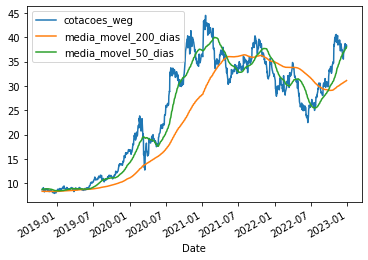

In [39]:
media_movel.plot()